## Hotspot trends over time on Census Tract

In [2]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_parquet("outputs/d2-events-2d5-230929.parquet") 

In [ ]:
df.head()

In [ ]:
df = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")

In [3]:
df = df.reset_index()

In [ ]:
trends_df = (
    df.groupby("GEOID")[
        [
            "time",
            "ws",
            "hw",
            "hs",
            "hws",
            "wfday",
            "hs5",
            "hws5",
            "ws5",
            "heatday",
            "smoke_pm_non_zero",
            "smoke_pm_gt_five",
        ]
    ]
    .resample("Y", on="time")
    .sum()
)

In [ ]:
trends_df.head()

ws  hw  hs  hws  wfday  hs5  hws5  ws5  heatday  \
GEOID       time                                                          
04001942600 2006-12-31   0   0   0    0      0    0     0    0        8   
            2007-12-31   0   0   2    0      0    1     0    0       11   
            2008-12-31   0   0   1    0      1    0     0    0        2   
            2009-12-31   0   0   1    0      0    0     0    0        4   
            2010-12-31   0   0   0    0      0    0     0    0        6   

                        smoke_pm_non_zero  smoke_pm_gt_five  
GEOID       time                                             
04001942600 2006-12-31                 29                 2  
            2007-12-31                 19                 2  
            2008-12-31                 24                 0  
            2009-12-31                 22                 3  
            2010-12-31                 18                 0

In [ ]:
%load_ext lab_black

In [27]:
import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()


In [ ]:
for x in hs_dict.keys():
    l = trends_df.groupby("GEOID")[x].sum().sort_values().tail(5).index
    plotting.trend_plot(trends_df, l, x, hs_dict[x]["title"], hs_dict[x]["title_map"])

## State-Specific Trend Plot

In [3]:
df = pd.read_parquet("outputs/d2-events-2d5-230929.parquet") 

In [4]:
df = df[['GEOID','wfday',
            'heatday',
            'smoke_pm_non_zero',
            'hw',
            'hs',
            'hws',
            'ws',]]

In [6]:
df= df.reset_index()

In [7]:
df_main= gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

In [10]:
df2 = df_main[['ST_ABBR','FIPS']]

In [12]:
df_merged = df.merge(df2, left_on='GEOID',right_on='FIPS')

In [17]:
df = df_merged[df_merged.ST_ABBR!='TX']

In [18]:
# check we are using the correct shape file that gives 18106 census tracts
pd.Series(df.GEOID.unique()).count()

18106

In [19]:
trends_df = (
    df.groupby(["ST_ABBR","GEOID"])[
        [
            'time',
            'wfday',
            'heatday',
            'smoke_pm_non_zero',
            'hw',
            'hs',
            'hws',
            'ws',
        ]
    ]
    .resample("Y", on="time")
    .sum()
)

In [20]:
trends_df.head()

wfday  heatday  smoke_pm_non_zero  hw  hs  \
ST_ABBR GEOID       time                                                    
AZ      04001942600 2006-12-31      0        8                 29   0   0   
                    2007-12-31      0       11                 19   0   2   
                    2008-12-31      1        2                 24   0   1   
                    2009-12-31      0        4                 22   0   1   
                    2010-12-31      0        6                 18   0   0   

                                hws  ws  
ST_ABBR GEOID       time                 
AZ      04001942600 2006-12-31    0   0  
                    2007-12-31    0   0  
                    2008-12-31    0   0  
                    2009-12-31    0   0  
                    2010-12-31    0   0

In [78]:

state_trend = trends_df.reset_index().groupby(["ST_ABBR","time"]).sum()
state_trend = state_trend.reset_index().rename(columns={"ST_ABBR": "STATE"})
state_trend = state_trend[state_trend.STATE!='TX']
state_trend ['year'] = state_trend ['time'].dt.year
state1_trend = state_trend.iloc[0:90, ]
state2_trend  = state_trend.iloc[90:181, ]


In [79]:
state_trend.head()
state_trend.shape

(165, 11)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotting

hsdict = {
    "wfday": {
        "title": "wildfire",
        "title_map": "Total tract days of wildfire burn zone",
    },
    "heatday": {
        "title": "heat",
        "title_map": "Total tract days of extreme heat",
    },
    "smoke_pm_non_zero": {
        "title": "smoke_pm_non_zero",
        "title_map": r"Total tract days of wildfire smoke",
    },
    "hws": {
        "title": "heat_wildfire_smoke_pollution_non_zero",
        "title_map": r"Total tract days of extreme heat, wildfire burn zone and wildfire smoke co-occurrence",
    },
    "hs": {
        "title": "heat_smoke_pollution_non_zero",
        "title_map": r"Total tract days of extreme heat and wildfire smoke co-occurrence",
    },
    "hw": {
        "title": "heat_wildfire",
        "title_map": "Total tract days of extreme heat and wildfire burn zone co-occurrence",
    },
    "ws": {
        "title": "wildfire_smoke_pollution_non_zero",
        "title_map": r"Total tract days of wildfire burn zone & wildfire smoke co-occurrence",
    }
}


In [35]:
import textwrap

In [89]:
def trend_plot(
    data, hotspot,  title_map, colors, ax
):
        
        g = sns.lineplot(
                data=data,
                x="year",
                y=hotspot,
                ax=ax,
                linestyle="--",
                hue="STATE",
                palette=colors,
                linewidth=1.5,
                )
        #sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1), title='STATE')

        ax.legend_.set_visible(False)  # Disable the legend for this specific subplot
    
        handles, labels = ax.get_legend_handles_labels()
    
        return handles, labels


In [90]:
import matplotlib.ticker as ticker

/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_3396/1788376544.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot(
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_3396/1788376544.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot(
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_3396/1788376544.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot(
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_3396/1788376544.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot(
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_3396/1788376544.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.lineplot(
/var/folders/lc/q1l1y0k17

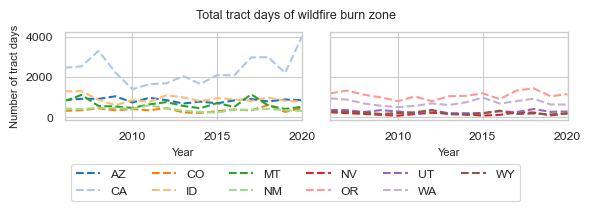

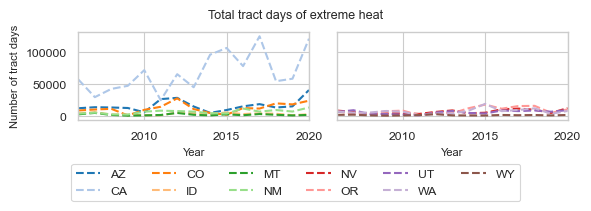

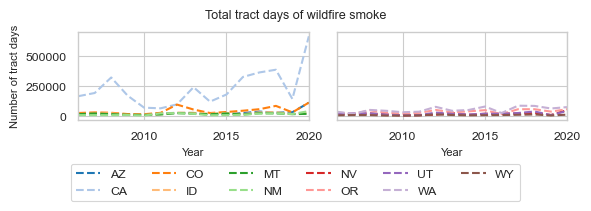

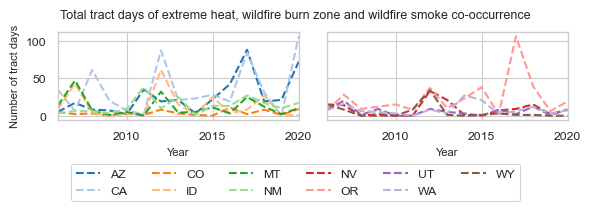

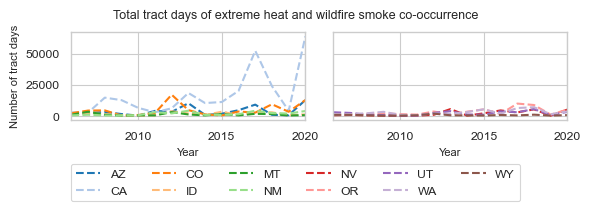

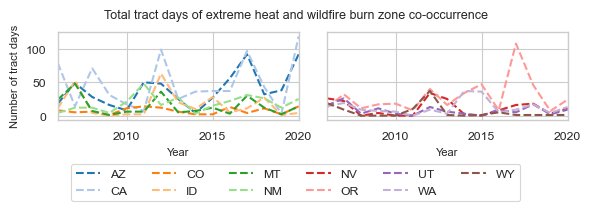

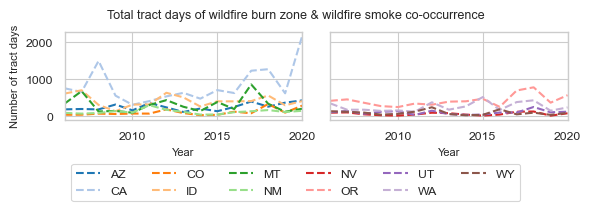

In [100]:
for x in hsdict.keys():
    f, ax = plt.subplots(1, 2, figsize=(6, 1.8), sharey=True)


    # Plot for the first state
    handles1, labels1 = trend_plot(state1_trend, x, hsdict[x]["title_map"], sns.color_palette("tab20")[0:6], ax=ax[0])

    # Plot for the second state
    handles2, labels2 = trend_plot(state2_trend, x, hsdict[x]["title_map"], sns.color_palette("tab20")[6:12], ax=ax[1])

    # Combine handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2

    # Add the combined legend
    f.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6)

    # Adjust layout to make space for the legend
    f.tight_layout() #rect=[0, 0.1, 1, 1])

    # trend_plot(state1_trend,  x,  hsdict[x]["title_map"], sns.color_palette("tab20")[0:6], ax=ax[0])
    
    # trend_plot(state2_trend,  x, hsdict[x]["title_map"],sns.color_palette("tab20")[6:12], ax=ax[1])
    ax[0].set_xlim(2006, 2020)
    ax[1].set_xlim(2006, 2020)

    ax[0].set_xlabel("Year", fontsize=8)
    ax[1].set_xlabel("Year", fontsize=8)

    ax[0].set_ylabel("Number of tract days", fontsize=8)
    wrapped_title = textwrap.fill(hsdict[x]["title_map"], 90)
    f.suptitle(wrapped_title, fontsize=9,y=0.9)
    ax[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.tight_layout()
    plt.savefig("figures/pdf/trends_group1_" + hs_dict[x]["title"]+ ".pdf", format="pdf", bbox_inches="tight", dpi=300)
